In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Change static power in P_serial_static and P_parallel_static

v_max, v_min, v_thresh = 1.3, 1.0, 0.9
P_serial_static = 5
P_serial_dynamic = 50
P_parallel_static_before = 5
P_parallel_dynamic_before = 50

T_before = 2
T_deadline = 0.3
serial = 0.05
parallel = 0.95
factor = 10

In [4]:
voltage_list = np.arange(v_min, v_max, 0.01)
energy_per_parallel_list = []
delay_parallel_list = []
energy_list = []
delay_list = []
num_cores_list = []
energy_delay_list = []
power_list = []

In [5]:
## serial energy 
P_serial = P_serial_static + P_serial_dynamic
T_serial = serial*T_before
E_static_serial = P_serial_static*T_serial
E_dynamic_serial = P_serial_dynamic*T_serial
E_serial = E_static_serial + E_dynamic_serial
print(f"E_serial: {E_serial} \nP_serial: {P_serial} \nT_serial: {T_serial}")

E_serial: 5.5 
P_serial: 55 
T_serial: 0.1


In [6]:
## parallel
T_parallel_deadline = T_deadline - T_serial
T_parallel_total_before = parallel*T_before
E_parallel_dynamic_before = P_parallel_dynamic_before *  T_parallel_total_before
E_parallel_static_before = P_parallel_static_before * T_parallel_total_before

In [7]:
for v in voltage_list:
    f2_f1 = (((v - v_thresh)/(v_max - v_thresh))**2)*(v_max/v)
    v2_v1 = (v/v_max)
    t2_t1 = 1/f2_f1

    T_parallel_total = t2_t1 *  T_parallel_total_before
       
    P_parallel_static = ((v2_v1)* P_parallel_static_before)/factor
    P_parallel_dynamic = ((v2_v1)**2)*(f2_f1)*P_parallel_dynamic_before

    E_parallel_static = P_parallel_static * T_parallel_total
    # E_parallel_dynamic = P_parallel_dynamic * T_parallel_total
    E_parallel_dynamic = (((v2_v1)**2) * E_parallel_dynamic_before)/factor

    N = T_parallel_total/T_parallel_deadline

    E_parallel = E_parallel_static + E_parallel_dynamic
    P_parallel = P_parallel_static + P_parallel_dynamic
    
    P_total = P_serial + P_parallel
    E_total = E_serial +  E_parallel
    T_total = T_serial + T_parallel_total

    EDP = E_parallel*T_parallel_total/N

    power_list.append(P_total)
    num_cores_list.append(N)
    energy_list.append(E_total)
    delay_list.append(T_total)

    energy_delay_list.append(EDP)

    energy_per_parallel_list.append(E_parallel/N)
    delay_parallel_list.append(T_parallel_total)
    


In [8]:
power_list = np.around(power_list, 2)
delay_list = np.around(delay_list,2)
energy_list = np.around(energy_list,2)
num_cores_list = np.ceil(num_cores_list)

energy_parallel_list = np.around(energy_per_parallel_list,2)
delay_parallel_list = np.around(delay_parallel_list,2)

energy_delay_list = np.around(energy_delay_list, 2)

In [9]:
data = pd.DataFrame(list(zip(voltage_list, power_list, energy_list, delay_list, 
    num_cores_list, energy_per_parallel_list, delay_parallel_list, energy_delay_list)), 
    columns=["Voltage", "Power", "Energy", "Delay", "Number of Parallel Cores", 
    "Energy per Parallel core", "Delay - all Parallel cores", "EDP - Parallel cores"])

In [10]:
data

,Voltage,Power,Energy,Delay,Number of Parallel Cores,Energy per Parallel core,Delay - all Parallel cores,EDP - Parallel cores
0,1.00,57.79,20.12,23.48,117.0,0.125000,23.38,2.92
1,1.01,58.33,18.82,19.62,98.0,0.136447,19.52,2.66
2,1.02,58.92,17.85,16.66,83.0,0.149077,16.56,2.47
3,1.03,59.58,17.11,14.35,72.0,0.162918,14.25,2.32
4,1.04,60.30,16.54,12.51,63.0,0.178000,12.41,2.21
5,1.05,61.08,16.10,11.01,55.0,0.194351,10.91,2.12
6,1.06,61.93,15.76,9.78,49.0,0.212000,9.68,2.05
7,1.07,62.84,15.50,8.76,44.0,0.230976,8.66,2.00
8,1.08,63.83,15.29,7.89,39.0,0.251308,7.79,1.96
9,1.09,64.88,15.14,7.16,36.0,0.273024,7.06,1.93


In [11]:
## Min Energy configuration with static and dynamic energy: 
energy_minidx = np.argmin(energy_list)
print(data.iloc[energy_minidx])

Voltage                        1.140000
Power                         71.220000
Energy                        14.830000
Delay                          4.730000
Number of Parallel Cores      24.000000
Energy per Parallel core       0.403385
Delay - all Parallel cores     4.630000
EDP - Parallel cores           1.870000
Name: 14, dtype: float64


In [12]:
## Min Energy configuration with only dynamic energy:
energy_minidx = np.argmin(energy_per_parallel_list)
print(data.iloc[energy_minidx])

Voltage                         1.000
Power                          57.790
Energy                         20.120
Delay                          23.480
Number of Parallel Cores      117.000
Energy per Parallel core        0.125
Delay - all Parallel cores     23.380
EDP - Parallel cores            2.920
Name: 0, dtype: float64


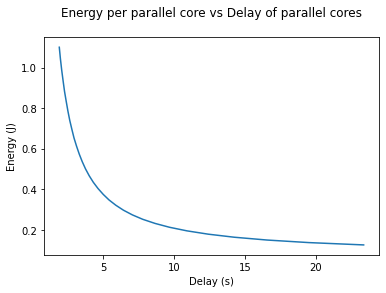

In [13]:
plt.plot(delay_parallel_list, energy_per_parallel_list)
plt.title("Energy per parallel core vs Delay of parallel cores\n")
plt.ylabel("Energy (J)")
plt.xlabel("Delay (s)")
plt.show()

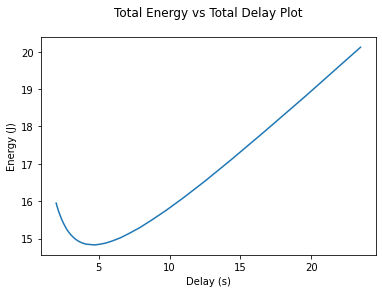

In [14]:
plt.plot(delay_list, energy_list)
plt.title("Total Energy vs Total Delay Plot\n")
plt.ylabel("Energy (J)")
plt.xlabel("Delay (s)")
plt.show()


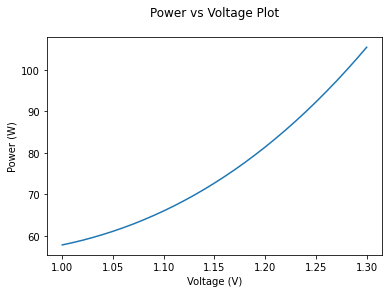

In [15]:
plt.plot(voltage_list, power_list)
plt.title("Power vs Voltage Plot\n")
plt.xlabel("Voltage (V)")
plt.ylabel("Power (W)")
plt.show()


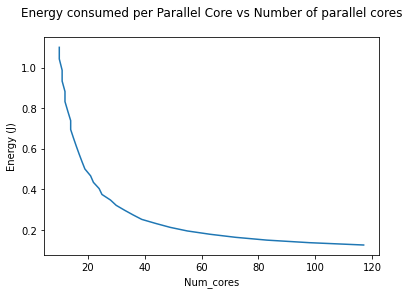

In [16]:
plt.plot(num_cores_list, energy_per_parallel_list)
plt.title("Energy consumed per Parallel Core vs Number of parallel cores\n")
plt.ylabel("Energy (J)")
plt.xlabel("Num_cores")
plt.show()

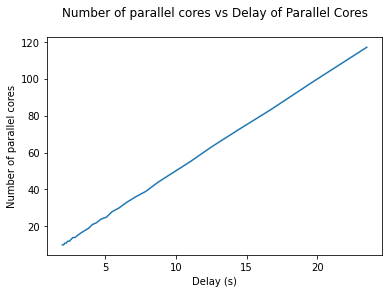

In [17]:
plt.plot(delay_list, num_cores_list)
plt.title("Number of parallel cores vs Delay of Parallel Cores\n")
plt.xlabel("Delay (s)")
plt.ylabel("Number of parallel cores")
plt.show()

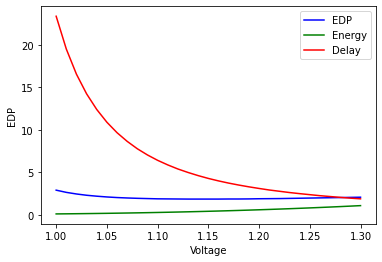

In [18]:

plt.plot(voltage_list, energy_delay_list, color='blue', label = "EDP")
plt.plot(voltage_list, energy_per_parallel_list, color='green', label = "Energy")
plt.plot(voltage_list, delay_parallel_list, color='red', label ="Delay")
plt.xlabel("Voltage")
plt.ylabel("EDP")
plt.legend()
plt.show()

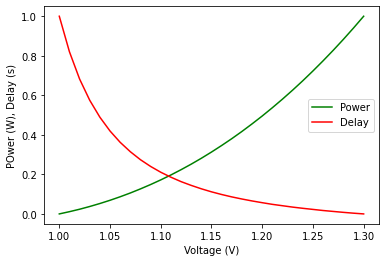

In [19]:
p_norm = np.interp(power_list, (power_list.min(), power_list.max()), (0, +1))
d_norm = np.interp(delay_list, (delay_list.min(), delay_list.max()), (0, +1))

plt.plot(voltage_list, p_norm, color='green', label = "Power")
plt.plot(voltage_list, d_norm, color='red', label ="Delay")
plt.xlabel("Voltage (V)")
plt.ylabel("POwer (W), Delay (s)")
plt.legend()
plt.show()